# Brain Stroke Prediction Using Machine Learning

In [1]:
import pandas as pd
!pip install scikit-learn scipy matplotlib numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (4, 4)

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('Dataset\healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data[['stroke','id']].groupby(['stroke']).count().reset_index()

,stroke,id
0,0,4861
1,1,249


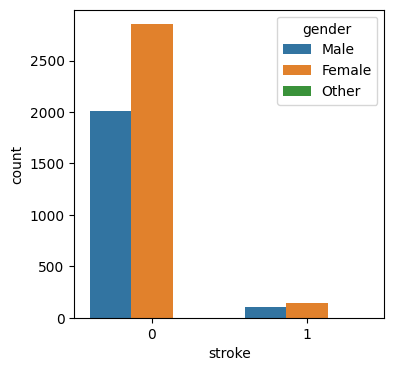

In [5]:
sns.countplot(x='stroke',hue='gender',data=data);
plt.show()

### BMI

Text(0.5, 1.0, 'BMI vs Stroke')

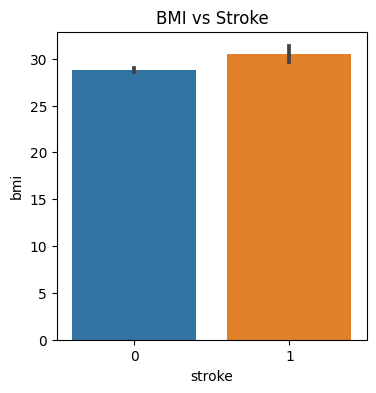

In [6]:
sns.barplot(x='stroke',y='bmi',data=data)
plt.title('BMI vs Stroke')

### Average glucose level

Text(0.5, 1.0, 'Avg_glucose_level vs Stroke')

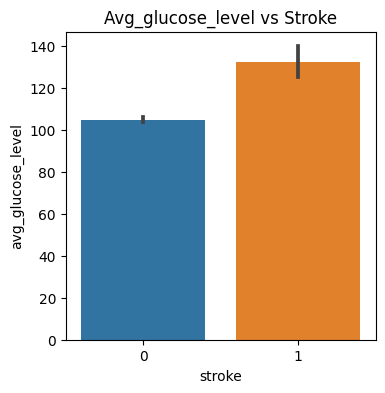

In [7]:
sns.barplot(x='stroke',y='avg_glucose_level',data=data)
plt.title('Avg_glucose_level vs Stroke')

### work_type

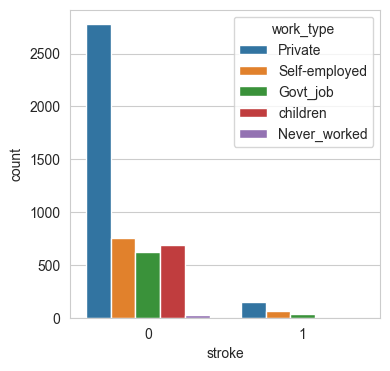

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='stroke',hue='work_type',data=data);
plt.show()

### Residence_type

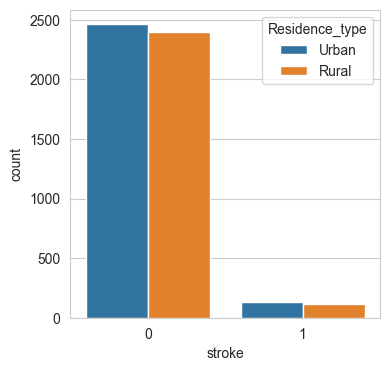

In [9]:
sns.countplot(x='stroke',hue='Residence_type',data=data);
plt.show()

### Smoking_status

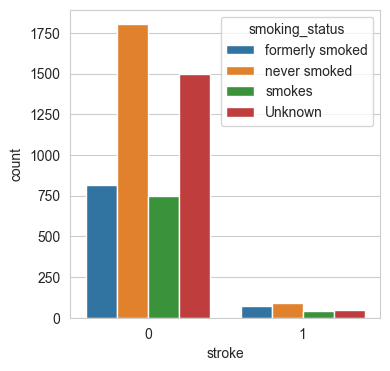

In [10]:
sns.set_style("whitegrid")
sns.countplot(x='stroke',hue='smoking_status',data=data);
plt.show()

## Exploratory Data Analysis

In [11]:
data.shape

(5110, 12)

data.info

In [12]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

 we want to remove this '201' null values of data['bmi'].

### Filling Null Values

In [13]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [15]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Hence removed the null values in data['bmi'] by replacing it with mean value.

In [17]:
#removing the 'id' column
data.drop('id',axis=1,inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### correlation matrix

In [18]:
corr=data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(data=corr,annot=True,cmap='Spectral').set(title='Correlation Matrix');

ValueError: could not convert string to float: 'Male'

### Outlier Removation

In [ ]:
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 8), dpi=800, facecolor='w', edgecolor='k');

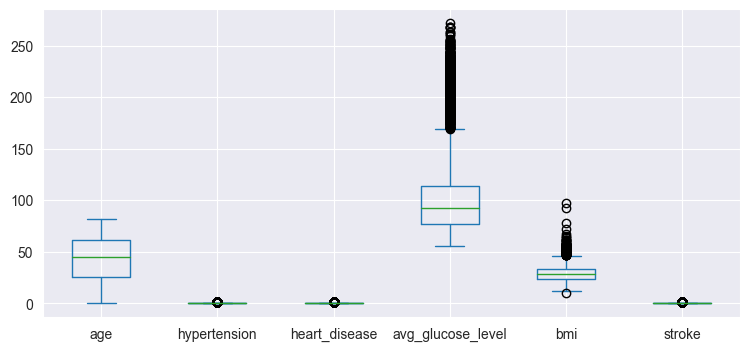

In [19]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (9, 4)
data.plot(kind='box')
plt.show()

In [20]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [21]:
data[data['avg_glucose_level']>114.090]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


since,there are about '1277' rows of data where avg_glucose_level>114 and actually avg_glucose_level>114 may be the reason for stroke.
Hence,we decided to keep this data rather than removing it.


### Label Encoding

In [22]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [24]:
gender=enc.fit_transform(data['gender'])
smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [25]:
data['work_type']=work_type
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [26]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## Splitting the data for train and test

X ---train_X,test_X  80/20

Y ---train_Y,test_Y

In [27]:
X=data.drop('stroke',axis=1)

In [28]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [29]:
Y=data['stroke']

In [30]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [32]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [33]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [34]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [35]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

### Normalize

In [36]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [38]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [39]:
import pickle
import os

In [40]:
scaler_path=os.path.join('models\scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [41]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [42]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

## Training

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [44]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [45]:
dt.feature_importances_

array([0.04507886, 0.17096557, 0.0254169 , 0.02496814, 0.00296279,
       0.03967405, 0.040096  , 0.3329498 , 0.26002621, 0.0578617 ])

In [46]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [47]:
Y_pred=dt.predict(X_test_std)
Y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
ac_dt=accuracy_score(Y_test,Y_pred)
ac_dt

0.9001956947162426

In [50]:
import joblib
model_path=os.path.join('models\dt.sav')
joblib.dump(dt,model_path)

['models\\dt.sav']

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [52]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [53]:
Y_pred_lr=lr.predict(X_test_std)
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)
ac_lr

0.9471624266144814

### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [56]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [57]:
Y_pred=knn.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
ac_knn=accuracy_score(Y_test,Y_pred)
ac_knn

0.9452054794520548

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [60]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [61]:
Y_pred=rf.predict(X_test_std)

In [62]:
ac_rf=accuracy_score(Y_test,Y_pred)
ac_rf

0.9452054794520548

### Support Vector Machine (SVM)

In [63]:
from sklearn.svm import SVC
sv=SVC()

In [64]:
sv.fit(X_train_std,Y_train)

SVC()

In [65]:
Y_pred=sv.predict(X_test_std)

In [66]:
ac_sv=accuracy_score(Y_test,Y_pred)
ac_sv

0.9471624266144814

## conclusion

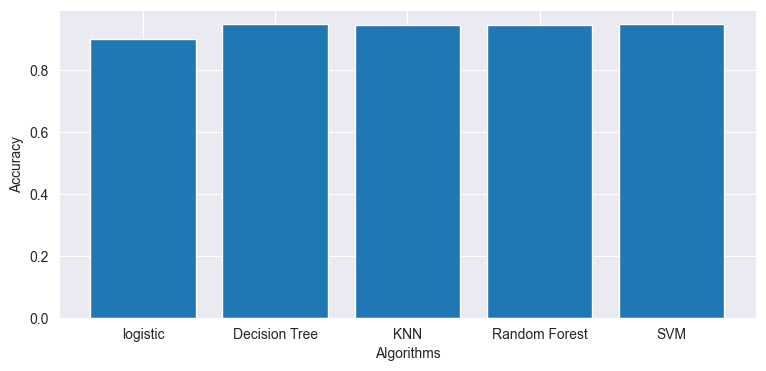

In [67]:
sns.set_style("darkgrid")
plt.bar(['logistic','Decision Tree','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()